## Data source

[국토정보플랫폼](https://map.ngii.go.kr/mi/openKey/openKeyInfo.do)

### manual

1. [국토정보플랫폼](https://map.ngii.go.kr/mi/openKey/openKeyInfo.do) 접속
2. OpenAPI 인증키 신청
3. [크롬드라이버](https://chromedriver.chromium.org/downloads) 다운로드. 자기 chrome과 동일한 버전 다운로드 받아야 함.
4. 크롬드라이버는 map.ipynb과 같은 디렉토리에 있어야 함
5. 서비스 URL은 https://127.0.0.1:[PORT]
6. run_local_server.py 실행 -> PORT 번호 설정해야 함
7. 아래 코드 순서대로 실행

In [2]:
%load_ext autoreload
%autoreload 2
import selenium
from selenium import webdriver
from selenium.webdriver import ActionChains

from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait

import os
import cv2
import numpy as np
import pandas as pd
import station as station_
from pyproj import Proj, Transformer
import util
import time

#Use argparse
AUTH_KEY = [r"EA3141F848A48130236498BA18E916C3"]
MODE = [4, 9]
ZOOM = [5,6,7,8,9]

rfile = "html/map_flexible.html"
wfile = "html/map_flexible_spc.html"
url = "http://127.0.0.1:8080/" + wfile

save_dir = "./data/map/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
#false label
import pandas as pd
df = pd.read_csv("./data/false_label.txt", header=None, delimiter=',')
df.columns = ['latitude', 'longitude']

In [1]:
%load_ext autoreload
%autoreload 2
import selenium
from selenium import webdriver
from selenium.webdriver import ActionChains

from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait

import os
import cv2
import numpy as np
import pandas as pd
import station as station_
from pyproj import Proj, Transformer
import util
import time
import re

In [22]:
a = pd.read_csv("order.csv", header=None).T.values
order = a.flatten()

In [28]:
a = pd.read_csv("order.csv", header=None).T.values
order = a.flatten()
files = np.array(os.listdir("./data/crop_map/"))
print(files.shape == order.shape, set(files) == set(order))

True True


In [27]:
files.shape == order.shape, set(files) == set(order)

(True, True)

In [2]:
len(os.listdir("./data/crop_map/"))

42475

In [3]:
a = pd.DataFrame(os.listdir("./data/crop_map"))

In [5]:
a.to_csv("order.csv", header=False, index=False)

In [7]:
import zipfile
starts = [0,10000,20000,30000]
ends = [10000,20000,30000,40000]
idxs = [1,2,3,4]

path = "./data/crop_map/"
out_path = "./"
files = os.listdir(path)

for start, end, idx in zip(starts, ends, idxs):
    print(start, end, idx)

    zip_file = zipfile.ZipFile(out_path + f"crop{idx}.zip", "w")

    for file in files[start:end]:
        if file.endswith(".png"):
            zip_file.write(os.path.join(path,file), compress_type=zipfile.ZIP_DEFLATED)

    zip_file.close()

0 10000 1


KeyboardInterrupt: 

In [2]:
dic = {'true':0, 'false':0}
for file in os.listdir('data/crop_map'):
    if file == "desktop.ini":
        continue
    expression = r"station_(?P<label>\w+)_(?P<station_id>\d+)_(?P<zoom>\d+)_(?P<mode>\w+).png"
    regex = re.compile(expression)
    label,station_id,zoom,mode = regex.findall(file)[0]

    if label == "true":
        dic['true'] += 1
    else:
        dic['false'] += 1

In [3]:
metadata = pd.read_csv("./data/metadata.csv")
metadata = metadata[metadata['label']==False]
metadata.shape

(4028, 5)

In [4]:
label = np.unique(metadata['score'], return_counts=True)[0]
count = np.unique(metadata['score'], return_counts=True)[1]
nan = count[-1]
count = count[:-1]
label, count

(array([ 0.,  1.,  2.,  3.,  4.,  5., nan]),
 array([ 496, 1361, 1031,  364,   76,    3], dtype=int64))

In [5]:
rate = count / count.sum()
vcount = count + rate * nan
vcount = vcount.astype(np.int32)
vcount.sum(), vcount
index = range(6)

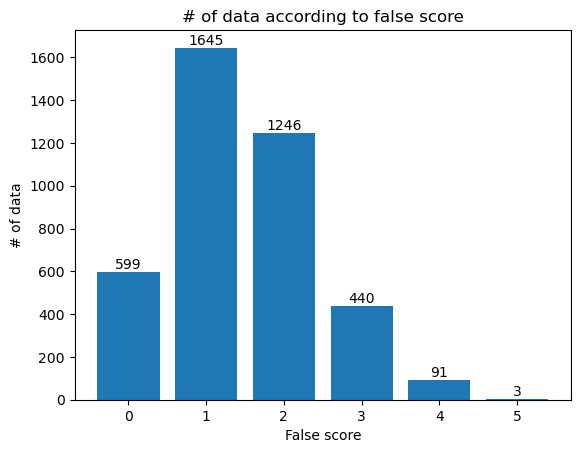

<Figure size 640x480 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
plt.figure()
plt.title("# of data according to false score")
bars = plt.bar(index, vcount)
plt.bar_label(bars)
plt.xlabel('False score')
plt.ylabel('# of data')
plt.show()
plt.savefig("fig.png")

In [4]:
[[key, value] for key, value in dic.items() if value != 2]

[]

In [18]:
#Use argparse
AUTH_KEY = [r"EA3141F848A48130236498BA18E916C3"]
MODE = [4] #[4, 9]
ZOOM = [8]

rfile = "html/map_flexible.html"
wfile = "html/map_flexible_spc.html"
url = "http://127.0.0.1:8080/" + wfile

save_dir = "./data/map/"

In [4]:
files = [(0,"./false_label/score0.txt"),(1, "./false_label/score1.txt"),(2, "./false_label/score2.txt")]
false_df_list = []
for idx, file in files:
    fd = open(file, 'r')
    txt = fd.read()
    txt = txt.split("\n")
    txt_parsed = [tt.split(" ") for tt in txt]
    df = pd.DataFrame(txt_parsed, columns=['latitude', 'longitude', 'score'])
    df = df.dropna()
    df = df.astype({"score":np.int32})
    df['score'] += idx
    false_df_list.append(df)

In [5]:
tquarter_false_metadata = pd.concat(false_df_list)
tquarter_false_metadata['station_ID'] = range(10697, 10697 + tquarter_false_metadata.shape[0])
tquarter_false_metadata['label'] = False
tquarter_false_metadata.head()

,latitude,longitude,score,station_ID,label
0,37.5446,127.0708,1,10697,False
1,37.5529,126.8765,2,10698,False
2,37.4751,127.1441,0,10699,False
3,37.5627,127.1564,1,10700,False
4,37.6416,127.0619,2,10701,False


In [16]:
station_df = station_.read_station_data('./data/station_2206.csv')
station_df = station_.process_station_data(station_df)
station_df = station_df.loc[:,['station_ID', 'latitude', 'longitude']]

In [7]:
station_df['label'] = True

In [8]:
station_df.head()

,station_ID,latitude,longitude,label
0,102,37.555649,126.910629,True
1,103,37.554951,126.910835,True
2,104,37.550629,126.914986,True
3,105,37.550007,126.914825,True
4,106,37.548645,126.912826,True


In [9]:
last_metadata = pd.read_csv("data/random_quarter_metadata.csv")
last_metadata_true = last_metadata[last_metadata['label'] == True]

In [10]:
tquarter_true_metadata = pd.merge(station_df, last_metadata_true, how='outer', indicator=True).query("_merge=='left_only'").drop(columns=['_merge'])

In [11]:
tquarter_metadata = pd.concat([tquarter_true_metadata, tquarter_false_metadata])

In [13]:
tquarter_metadata.to_csv("data/three_quarter_metadata.csv", index=False)

In [15]:
quarter_metadata = pd.read_csv("data/random_quarter_metadata.csv")
quarter_metadata

,label,station_ID,latitude,longitude
0,True,107,37.557510,126.918503
1,True,108,37.552746,126.918617
2,True,126,37.550411,126.943848
3,True,128,37.555496,126.936340
4,True,135,37.559101,126.939178
...,...,...,...,...
1189,False,10692,37.530000,126.952600
1190,False,10693,37.644200,127.053600
1191,False,10694,37.535700,126.902300
1192,False,10695,37.547500,126.884000


In [19]:
total_metadata = pd.concat([tquarter_metadata, quarter_metadata])

In [20]:
total_metadata = total_metadata.reset_index(drop=True)

In [23]:
total_metadata = total_metadata.sort_values(by='station_ID')

In [24]:
total_metadata.to_csv("./data/metadata.csv",index=False)

In [20]:
station_df = pd.read_csv("data/three_quarter_metadata.csv")
station_df = station_.process_station_data(station_df)

In [7]:
station_df.iloc[4000]

station_ID            12541
latitude            37.6026
longitude          127.0223
label                 False
score                   1.0
x             957833.776603
y             1956016.39455
Name: 4000, dtype: object

In [22]:
station_df[station_df['station_ID']==13724], station_df.shape

(      station_ID  latitude  longitude  label  score              x  \
 5183       13724   37.4976   127.1328  False    2.0  967542.067938   
 
                  y  
 5183  1.944323e+06  ,
 (5487, 7))

In [23]:
station_df.iloc[5183]

station_ID            13724
latitude            37.4976
longitude          127.1328
label                 False
score                   2.0
x             967542.067938
y             1944323.37325
Name: 5183, dtype: object

In [26]:
station_df['station_ID'][:2000]

0        102
1        103
2        104
3        105
4        106
        ... 
1995    4589
1996    4591
1997    4594
1998    4598
1999    4599
Name: station_ID, Length: 2000, dtype: int64

In [13]:
pd.DataFrame(os.listdir('data/map')).to_csv("hello.csv")

In [109]:
#crawl false data
words_list = util.cartesian_product(AUTH_KEY, MODE, ZOOM, [station_false_df['station_ID'][0]])
driver = webdriver.Chrome(executable_path='chromedriver')
driver.get(url=url)
time.sleep(1.5)
for words in words_list:
    station = dict(zip(station_false_df.columns, station_false_df[station_false_df['station_ID']==words[-1]].values[0]))
    words += (station['x'], station['y'])
    print(station, words)
    util.specify_file(rfile, wfile,["<API_KEY>","<MODE>","<ZOOM>","<NOT_TOKEN>","<X_COORD>","<Y_COORD>"],words)
    time.sleep(1)
    driver.refresh()
    time.sleep(1.5)
    canvas = driver.find_element_by_xpath(r'//*[@id="map1"]/div/div[1]/div/canvas')
    canvas.screenshot(save_dir + f"station_false_{station['station_ID']}_{words[2]}_{words[1]}.png")

{'latitude': 37.5409, 'longitude': 127.0485, 'x': 960113.5517086817, 'y': 1949159.6521528624, 'station_ID': 10000.0} ('EA3141F848A48130236498BA18E916C3', 9, 6, 10000, 960113.5517086817, 1949159.6521528624)


AttributeError: 'WebDriver' object has no attribute 'find_element_by_xpath'

In [25]:
#crawl_true_data
words_list = util.cartesian_product(AUTH_KEY, MODE, ZOOM, station_df['station_ID'][5183:])
driver = webdriver.Chrome(executable_path='chromedriver')
driver.get(url=url)
time.sleep(1.5)
for words in words_list:
    station = dict(zip(station_df.columns, station_df[station_df['station_ID']==words[-1]].values[0]))
    words += (station['x'], station['y'])
    print(station, words)
    util.specify_file(rfile, wfile,["<API_KEY>","<MODE>","<ZOOM>","<NOT_TOKEN>","<X_COORD>","<Y_COORD>"],words)
    time.sleep(1)
    driver.refresh()
    time.sleep(1.5)
    canvas = driver.find_element_by_xpath(r'//*[@id="map1"]/div/div[1]/div/canvas')
    canvas.screenshot(save_dir + f"station_false_{station['station_ID']}_{words[2]}_{words[1]}.png")

{'station_ID': 13724, 'latitude': 37.4976, 'longitude': 127.1328, 'label': False, 'score': 2.0, 'x': 967542.0679382078, 'y': 1944323.3732500689} ('EA3141F848A48130236498BA18E916C3', 4, 8, 13724, 967542.0679382078, 1944323.3732500689)
{'station_ID': 13725, 'latitude': 37.4651, 'longitude': 126.9316, 'label': False, 'score': 2.0, 'x': 949735.4916334697, 'y': 1940806.0958323292} ('EA3141F848A48130236498BA18E916C3', 4, 8, 13725, 949735.4916334697, 1940806.0958323292)
{'station_ID': 13726, 'latitude': 37.5162, 'longitude': 127.1123, 'label': False, 'score': 2.0, 'x': 965738.5049180777, 'y': 1946394.1878993283} ('EA3141F848A48130236498BA18E916C3', 4, 8, 13726, 965738.5049180777, 1946394.1878993283)
{'station_ID': 13727, 'latitude': 37.5567, 'longitude': 126.9769, 'label': False, 'score': 2.0, 'x': 953797.9699752614, 'y': 1950945.3601418633} ('EA3141F848A48130236498BA18E916C3', 4, 8, 13727, 953797.9699752614, 1950945.3601418633)
{'station_ID': 13728, 'latitude': 37.5465, 'longitude': 126.9338

--------------------------------------------밑에는 테스트 코드입니다--------------------------------------------------------

In [41]:
import requests
from selenium import webdriver
import base64
import re
import time

words_list = util.cartesian_product(AUTH_KEY, MODE, ZOOM, station_df['station_ID'][30:35])
driver = webdriver.Chrome(executable_path='chromedriver')
driver.get(url=url)
time.sleep(3)
canvas = driver.find_element_by_xpath(r'//*[@id="map1"]/div/div[1]/div/canvas')
print(canvas.screenshot("hello2.png"))
# get the canvas as a PNG base64 string
#canvas_base64 = driver.execute_script("return arguments[0].toDataURL('image/png').substring(21);", canvas)
canvas_base64 = driver.execute_script("return document.querySelector('canvas').toDataURL('image/png').substring(21);")
# decode
canvas_png = base64.b64decode(canvas_base64)

# save to a file
with open(r"canvas.png", 'wb') as f:
    f.write(canvas_png)

ProtocolError: ('Connection aborted.', ConnectionResetError(10054, '현재 연결은 원격 호스트에 의해 강제로 끊겼습니다', None, 10054, None))

In [42]:
img = cv2.imread('hello2.png')
img = cv2.circle(img, [int(img.shape[1]/2), int(img.shape[0]/2)], 10, (50,100,100), 2)
cv2.imshow("hello",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [35]:
words_list = util.cartesian_product(AUTH_KEY, MODE, ZOOM, station_df['station_ID'][30:35])
driver = webdriver.Chrome(executable_path='chromedriver')
driver.get(url=url)
time.sleep(1.5)
for words in words_list:
    station = dict(zip(station_df.columns, station_df[station_df['station_ID']==words[-1]].values[0]))
    words += (station['x'], station['y'])
    print(station, words)
    util.specify_file(rfile, wfile,["<API_KEY>","<MODE>","<ZOOM>","<NOT_TOKEN>","<X_COORD>","<Y_COORD>"],words)
    time.sleep(1)
    driver.refresh()
    time.sleep(1.5)
    driver.save_screenshot(save_dir + f"station_{station['station_ID']}_{words[1]}_{words[2]}.png")

{'station_ID': 134, 'station_name': '연세로 명물길', 'location': '서대문구', 'address': '서울특별시 서대문구 명물길 33', 'latitude': 37.55789185, 'longitude': 126.9380798, 'installation_date': '2020-11-11', 'x': 950369.9964732081, 'y': 1951097.3799181927} ('EA3141F848A48130236498BA18E916C3', 4, 13, 134, 950369.9964732081, 1951097.3799181927)
{'station_ID': 135, 'station_name': '명물길 원형무대 앞', 'location': '서대문구', 'address': '서대문구 창천동 31-69', 'latitude': 37.5591011, 'longitude': 126.9391785, 'installation_date': '2015-09-07', 'x': 950467.8373371066, 'y': 1951230.9607296553} ('EA3141F848A48130236498BA18E916C3', 4, 13, 135, 950467.8373371066, 1951230.9607296553)
{'station_ID': 137, 'station_name': '신촌기차역입구 교차로', 'location': '서대문구', 'address': '서울특별시 서대문구 연세로2다길 58', 'latitude': 37.55681229, 'longitude': 126.9431839, 'installation_date': '2015-09-07', 'x': 950820.0957589824, 'y': 1950974.9251746254} ('EA3141F848A48130236498BA18E916C3', 4, 13, 137, 950820.0957589824, 1950974.9251746254)
{'station_ID': 138, 'station

## Data source

네이버지도

### Manual
1. [네이버 클라우드 플랫폼](https://www.ncloud.com/) 회원가입
2. 콘솔 -> Services -> AI-NAVER API
3. Application 등록
4. Web Dynamic Map / Static Map / Geocoding 선택
5. Web 서비스 URL은 https://127.0.0.1:[PORT]
6. run_local_server.py 실행 -> PORT 번호 설정해야 함
7. 웹에서 127:0.0.1:[PORT] 접속
8. 네이버지도 로드하는 html 파일 클릭

### Note
Selenium 같은 걸로 캡처 하는 식으로 하는게 해야 할 듯

In [2]:
ID =  "q4d8g94x86"
KEY = "2GVJJEQBJiFMa82NRzZMh75xEluCgiAbhelfsTyH"

### 문제점
1. text 제거 불가능

## Edit HTML & take screenshot
This example is about naver map

In [1]:
%load_ext autoreload
%autoreload 2
import selenium
from selenium import webdriver
from selenium.webdriver import ActionChains

from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait

import cv2
import numpy as np
import pandas as pd
import station as acq
from pyproj import Proj, Transformer
import util

In [87]:
URL = "http://127.0.0.1:8080/html/map_103_flexible.html" #/html/map_103_flexible.html
#URL = "https://google.com"
driver = webdriver.Chrome(executable_path='chromedriver')
driver.get(url=URL)
driver.implicitly_wait(3)
driver.save_screenshot("./data/map/station.png")
driver.refresh()
driver.implicitly_wait(3)
#driver.get(url="https://google.com")

In [5]:
station_df = acq.read_station_data('./data/station_2206.csv')
station_df = acq.process_station_data(station_df)
#html 코드 수정
#url 이동
#스크린샷

In [16]:
fd = open("./html/map_flexible.html",'w')
content = fd.read()
src = ["<API_KEY>","<MODE>","<X_COORD>","<Y_COORD>","<ZOOM>"]
dst = ["EA3141F848A48130236498BA18E916C3","9","947943.927056","1950863.372943","10"]
for s,d in zip(src, dst):
    content = content.replace(s,d)
fd2 = open("./html/map_103_flexible.html",'a')
fd2.write(content)
fd.close()
fd2.close()

In [20]:
import cv2
import preprocessing
img = cv2.imread('vworld.png')
row = img.shape[0]//2
col = img.shape[1]//2
img = preprocessing.crop(img, [384,384])
img = preprocessing.circle_masking(img, [192, 192])
cv2.imshow("hello world", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
#show image with center circle
img = cv2.imread("./data/map/station102_ngis.PNG")
img = cv2.circle(img, (np.array(img.shape)[:2]/2).astype(np.int32), 50, (255,0,0), 15)
cv2.imshow("hello", img)
cv2.waitKey(0)
cv2.destroyAllWindows()